# AskReddit Troll Question Detection Challenge

## Imports

In [33]:
import numpy as np 
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from wordcloud import WordCloud

In [34]:
# To use data that is Lemmatized
train_df = pd.read_csv("processed_train_data.csv")

# To use data that is not Lemmatized
# train_df = pd.read_csv("train.csv")
# train_df.head()
# train_df.drop(['qid'],axis=1)

## Preprocessing

### Checking Duplicated and Null

In [35]:
train_df.dropna(axis=1)
train_df.drop_duplicates(inplace=True)

### Dropping the qid

In [36]:
train_df.head()

,question_text,target
0,role lua civ,0.0
1,important chapter kannada icse,0.0
2,musician get royalty youtube,0.0
3,difference scaling social enterprise social fr...,0.0
4,elevator go super slow right door open,0.0


### Data Balance Check

,question_text,target
0,role lua civ,0.0
1,important chapter kannada icse,0.0
2,musician get royalty youtube,0.0
3,difference scaling social enterprise social fr...,0.0
4,elevator go super slow right door open,0.0


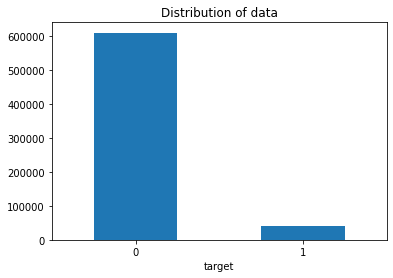

In [37]:
import matplotlib.pyplot as plt

# Plotting the distribution for dataset.
ax = train_df.groupby('target').count().plot(kind='bar', title='Distribution of data',legend=False)
ax.set_xticklabels(['0','1'], rotation=0)

sentences = train_df['question_text'].values.astype('U')
sentences = sentences.tolist()
train_df.head()

Hence, we need to balance the data some how.

- As the data is in string so we cannot do balancing of data right now.
- We cannot duplicate the data here as in that case we will affect the vectorisation of the base data (We tried but that didn't work well).
- Now we will first vectorize the data and then use balancing data techniques.

### Splitting Data

In [38]:
from sklearn.model_selection import train_test_split 

train_X, test_X, train_y, test_y = train_test_split(train_df.drop(['target'],axis=1),train_df['target'] , train_size=0.6)

In [39]:
majority_class = train_X[train_y==0]
minority_class = train_X[train_y==1]

# print(minority_class[0:10])

majority_class = majority_class['question_text'].values.astype('U')
majority_class = majority_class.tolist()

minority_class = minority_class['question_text'].values.astype('U')
minority_class = minority_class.tolist()

temp = []
for i in range(15):
    temp = temp+minority_class

minority_class = temp

# majority_class = majority_class[0:len(minority_class)*10]

In [40]:
words_maj = []

for sentence in majority_class:
    for word in sentence.split():
        words_maj.append(word)

In [41]:
words_min = []

for sentence in minority_class:
    for word in sentence.split():
        words_min.append(word)

In [42]:
import collections

frequency_maj = collections.Counter(words_maj)
frequency_maj = dict(frequency_maj)
item_to_be_deleted = []
for i in frequency_maj:
    if(frequency_maj[i]<=5):
        item_to_be_deleted.append(i)
    # if(frequency_maj[i] == 20):
    #     print(i)

print(len(frequency_maj))
print(len(item_to_be_deleted))
print(len(frequency_maj)-len(item_to_be_deleted))


for i in item_to_be_deleted:
    frequency_maj.pop(i)

85595
65491
20104


In [43]:
import collections

frequency_min = collections.Counter(words_min)
frequency_min = dict(frequency_min)
item_to_be_deleted = []
# frequency_min.sort()
for i in frequency_min:
    if(frequency_min[i]<=0):
        item_to_be_deleted.append(i)
    # if(frequency_min[i] == 10):
    #     print(i)

print(len(frequency_min))
print(len(item_to_be_deleted))
print(len(frequency_min)-len(item_to_be_deleted))

for i in item_to_be_deleted:
    frequency_min.pop(i)

18719
0
18719


In [44]:
vocab_maj = []
for i in frequency_maj:
    vocab_maj.append(i)

vocab_min = []
for i in frequency_min:
    vocab_min.append(i)

# print(vocab)

In [45]:
y1_zeros = []
for i in range(len(majority_class)):
    y1_zeros.append(0)
y2_ones = []
for i in range(len(minority_class)):
    y2_ones.append(1)
train_X = majority_class+minority_class
train_y = y1_zeros+y2_ones

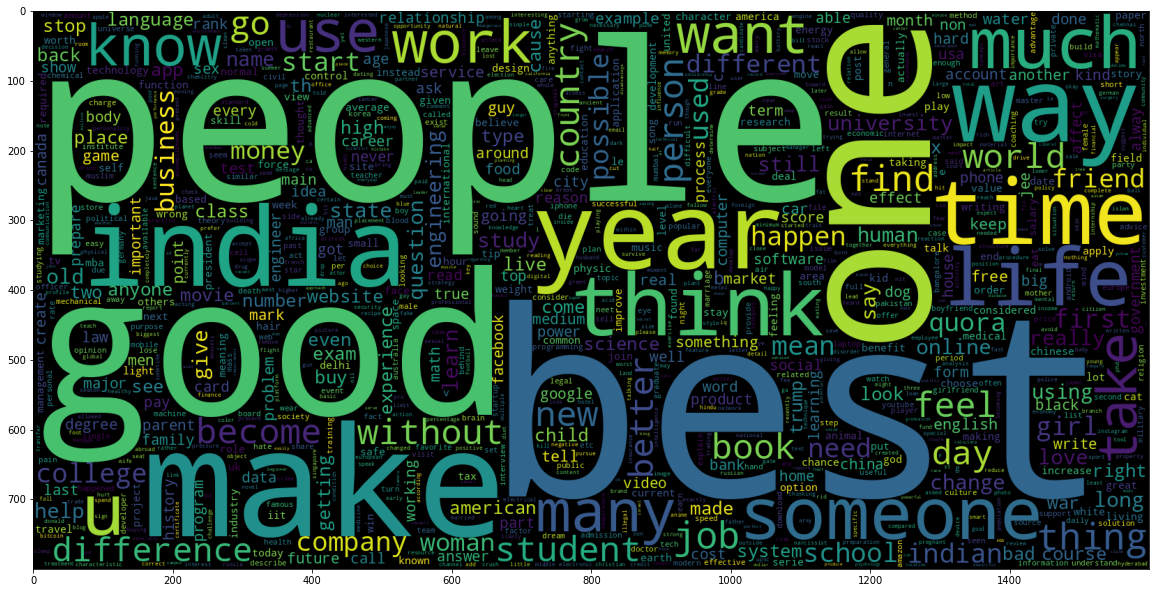

In [48]:
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,collocations=False).generate(" ".join(majority_class))
plt.imshow(wc)

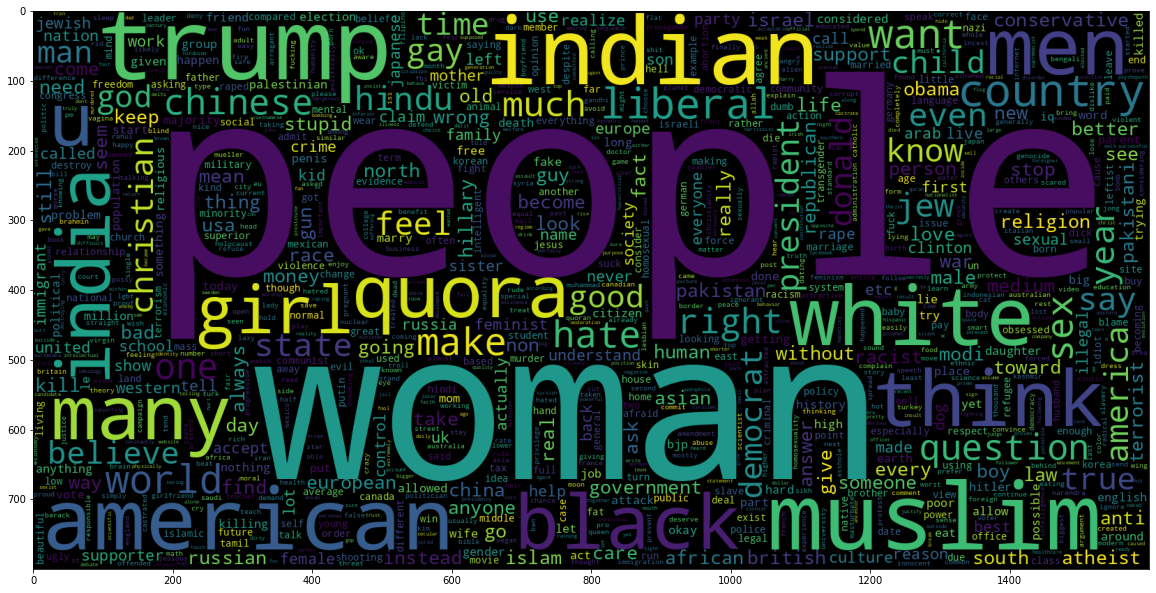

In [47]:
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,collocations=False).generate(" ".join(minority_class))
plt.imshow(wc)

### Spilting Data

[365508 362880]


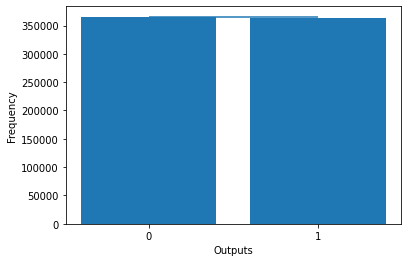

In [ ]:
# Plotting the distribution for dataset.
train_y_list = train_y
train_y_list = [str(int(i)) for i in train_y_list]

value, freq = np.unique(train_y_list,return_counts=True)
print(freq)

plt.bar(value,freq,align='center')
plt.xlabel('Outputs')
plt.ylabel('Frequency')
for i in range(len(freq)):
    plt.hlines(freq[i],1,value[i])
plt.show()

## Vectoring Words

In [ ]:
vocab = vocab_maj+vocab_min
vocab = set(vocab)

test_X = test_X['question_text'].values.astype('U')
test_X = test_X.tolist()

### Bag Of Words

In [ ]:
cv = CountVectorizer(vocabulary=vocab,lowercase=False,stop_words='english')
cv.fit(train_X)
X1_train = cv.transform(train_X)
X1_test = cv.transform(test_X)

In [ ]:
X1_train = X1_train.astype(float)
X1_test = X1_test.astype(float)

### TF IDF

In [ ]:
cv = TfidfVectorizer(vocabulary=vocab,lowercase=False,stop_words='english')
cv.fit(train_X)
X2_train = cv.transform(train_X)
X2_test = cv.transform(test_X)

In [ ]:
X2_train = X2_train.astype(float)
X2_test = X2_test.astype(float)

## Model generation

### Checking the distribution of Data

In [ ]:
# import matplotlib.pyplot as plt

# train_y1_list = y1_zeros+y2_ones
# train_y1_list = [str(int(i)) for i in train_y1_list]

# value, freq = np.unique(train_y1_list,return_counts=True)
# print(freq)

# plt.bar(value,freq,align='center')
# plt.xlabel('Outputs')
# plt.ylabel('Frequency')
# for i in range(len(freq)):
#     plt.hlines(freq[i],1,value[i])
# plt.show()

### Clearly we need to remove this imbalance

In [ ]:
# Not able to work on sparse matrix
# from imblearn.over_sampling import SMOTE 

# sm = SMOTE()
# X_train_sm, y_train_sm = sm.fit_resample(train_X1, train_y1)
# print(len(X_train_sm), len(y_train_sm))

### For data genrated by "Bag of words" method  

In [ ]:
lreg1 = LogisticRegression(solver='liblinear')
lreg1.fit(X1_train,train_y)

LogisticRegression(solver='liblinear')

#### For data generated by "TD IDF" method

In [ ]:
lreg2 = LogisticRegression(solver='liblinear')
lreg2.fit(X2_train,train_y)

LogisticRegression(solver='liblinear')

### Confusion Matrix

In [ ]:
# Compute and plot the Confusion matrix
def confusion_matrix_for_data(y_test, y_pred):
    cf_matrix = confusion_matrix(y_test, y_pred)

    categories  = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
                xticklabels = categories, yticklabels = categories)

    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

#### Predict for X1, Y1

In [ ]:
train_yhat1 = lreg1.predict_proba(X1_train)
test_yhat1 = lreg1.predict_proba(X1_test)

# print(X1_test.shape)

print("training score = ", roc_auc_score(train_y, train_yhat1[:,1]))
print("test score = ", roc_auc_score(test_y,test_yhat1[:,1]))

threshold = 0.5

train_output1 = (train_yhat1[:,1] > threshold).astype(int)
test_output1 = (test_yhat1[:,1] > threshold).astype(int)

training score =  0.975939731128197
test score =  0.9280268924568972


In [ ]:
print("training score = ", f1_score(train_y, train_output1))
print(classification_report(train_y, train_output1),'\n')

print("testing score = ", f1_score(test_y, test_output1))
print(classification_report(test_y, test_output1),'\n')

training score =  0.9377970132450061
              precision    recall  f1-score   support

           0       0.95      0.92      0.94    365508
           1       0.93      0.95      0.94    362880

    accuracy                           0.94    728388
   macro avg       0.94      0.94      0.94    728388
weighted avg       0.94      0.94      0.94    728388
 

testing score =  0.5172329002909717
              precision    recall  f1-score   support

         0.0       0.98      0.92      0.95    243739
         1.0       0.39      0.79      0.52     16061

    accuracy                           0.91    259800
   macro avg       0.69      0.85      0.73    259800
weighted avg       0.95      0.91      0.92    259800
 



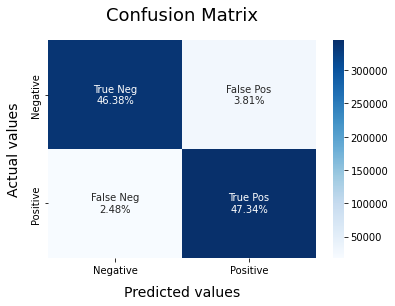

In [ ]:
confusion_matrix_for_data(train_y, train_output1)

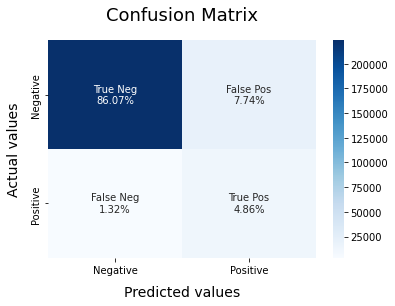

In [ ]:
confusion_matrix_for_data(test_y, test_output1)

#### Predict for X2, Y2

In [ ]:
train_yhat2 = lreg2.predict_proba(X2_train)
test_yhat2 = lreg2.predict_proba(X2_test)

# print("training score = ", roc_auc_score(train_y2, train_yhat2[:,1]))
# print("test score = ", roc_auc_score(test_y2,test_yhat2[:,1]))

threshold = 0.5

train_output2 = (train_yhat2[:,1] > threshold).astype(int)
test_output2 = (test_yhat2[:,1] > threshold).astype(int)

test_y = test_y.astype(int)

In [ ]:
print("training score = ", f1_score(train_y, train_output2))
print(classification_report(train_y, train_output2),'\n')

print("testing score = ", f1_score(test_y, test_output2))
print(classification_report(test_y, test_output2))

training score =  0.9317330120832609
              precision    recall  f1-score   support

           0       0.95      0.91      0.93    365508
           1       0.91      0.95      0.93    362880

    accuracy                           0.93    728388
   macro avg       0.93      0.93      0.93    728388
weighted avg       0.93      0.93      0.93    728388
 

testing score =  0.4997255710960122
              precision    recall  f1-score   support

           0       0.99      0.90      0.94    243739
           1       0.36      0.82      0.50     16061

    accuracy                           0.90    259800
   macro avg       0.67      0.86      0.72    259800
weighted avg       0.95      0.90      0.92    259800



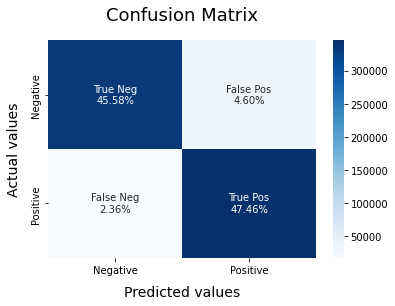

In [ ]:
confusion_matrix_for_data(train_y, train_output2)

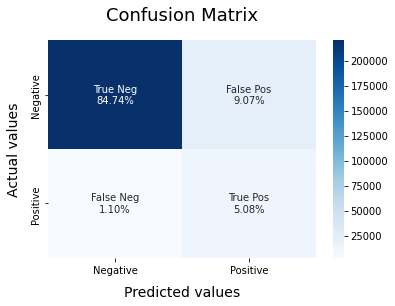

In [ ]:
confusion_matrix_for_data(test_y, test_output2)